## Loan Prediction

**Done by:**<br>Gabriel Egbenya<br>Loan Prediction<br>AKA devgabriel

#### The idea behind this ML project is to build a model that will classify the loan status of the applicants.

This dataset was gotten from https://www.kaggle.com/

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

## Import Dataset

I will be training the model on loan_train_df dataset, after which I will load the testing dataset from directory to test the model

In [2]:
#Load training dataset

loan_train_df = pd.read_csv("loan_prediction_train_data.csv")
nrows, ncols = loan_train_df.shape
print(f'There are {nrows} rows and {ncols} columns')

There are 614 rows and 13 columns


In [3]:
#Load testing dataset

loan_test_df = pd.read_csv("loan_prediction_test_data.csv")
nrows, ncols = loan_test_df.shape
print(f'There are {nrows} rows and {ncols} columns')

There are 367 rows and 12 columns


As we can see, the original training dataset and the test dataset number of columns are different. It seems the Loan_Status column for the test dataset was not included; we need to compute it. After I built the optimized model, I will use the model to compute the Loan_Status column and insert it into the loan_test_df

Lets do some data wrangling to better understand the dataset

In [4]:
loan_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_train_df.index

RangeIndex(start=0, stop=614, step=1)

In [6]:
loan_train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Check if there are duplicates
dup_values = loan_train_df.duplicated()
print(dup_values.any())

# List all duplicate rows
print(loan_train_df[dup_values])

False
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [9]:
#check the unique values in each columns and sort them. This will enable us drop single-value columns.

print(loan_train_df.nunique().sort_values(ascending=True).reset_index(name='count'))

                index  count
0              Gender      2
1             Married      2
2           Education      2
3       Self_Employed      2
4      Credit_History      2
5         Loan_Status      2
6       Property_Area      3
7          Dependents      4
8    Loan_Amount_Term     10
9          LoanAmount    203
10  CoapplicantIncome    287
11    ApplicantIncome    505
12            Loan_ID    614


In [10]:
#Count the total number of null values in each columns.

print(loan_train_df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
loan_train_df['Gender'].fillna(loan_train_df['Gender'].mode()[0], inplace=True)
loan_train_df['Married'].fillna(loan_train_df['Married'].mode()[0], inplace=True)
loan_train_df['Dependents'].fillna(loan_train_df['Dependents'].mode()[0], inplace=True)
loan_train_df['Self_Employed'].fillna(loan_train_df['Self_Employed'].mode()[0], inplace=True)
loan_train_df['LoanAmount'].fillna(loan_train_df['LoanAmount'].median(), inplace=True)
loan_train_df['Loan_Amount_Term'].fillna(loan_train_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train_df['Credit_History'].fillna(loan_train_df['Credit_History'].mode()[0], inplace=True)

Since there are over 21% missing value, we will be filling the missing value with the most appropraite value (mean, median, or mode)

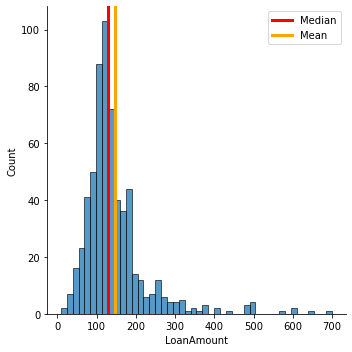

In [12]:
# Example of numerical value histogram why we choose the median instead of the mean
sns.displot(loan_train_df['LoanAmount'])
plt.axvline(x=loan_train_df['LoanAmount'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=loan_train_df['LoanAmount'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

In [13]:
#There are no more missing values in the DataFrame

print(loan_train_df.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
#check for unique values in each column and list them.

for col in loan_train_df.columns:
    print(col, loan_train_df[col].unique())

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

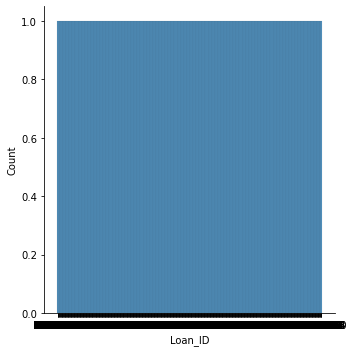

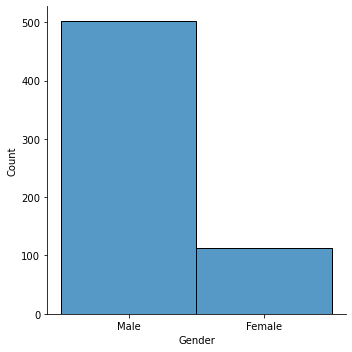

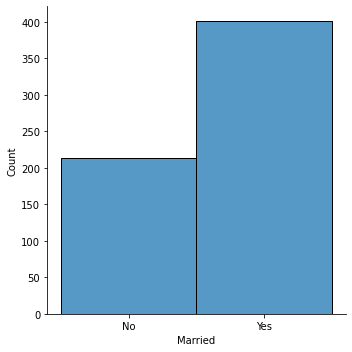

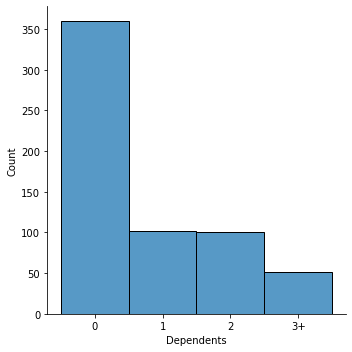

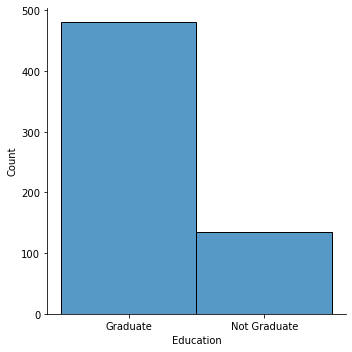

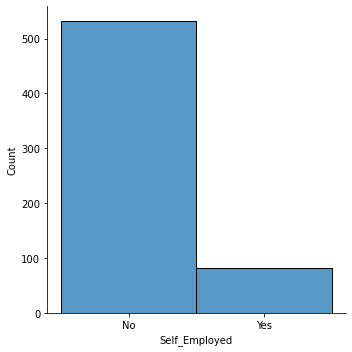

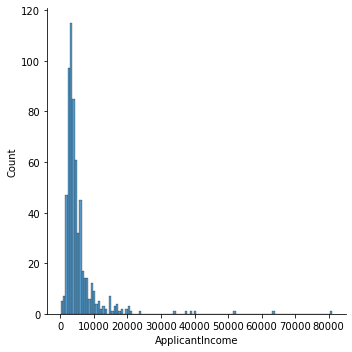

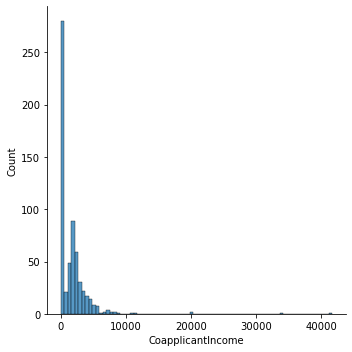

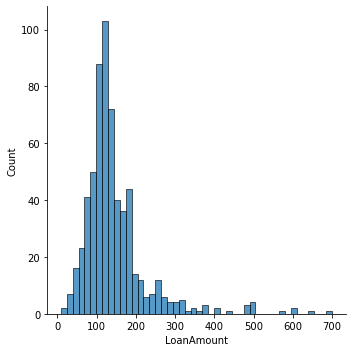

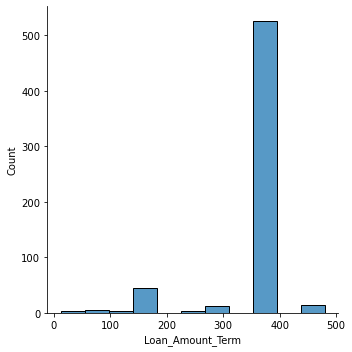

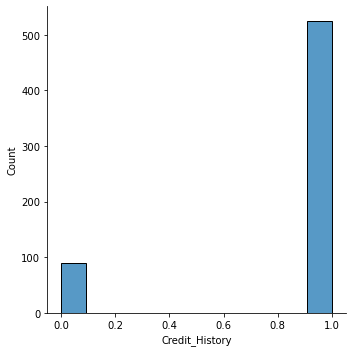

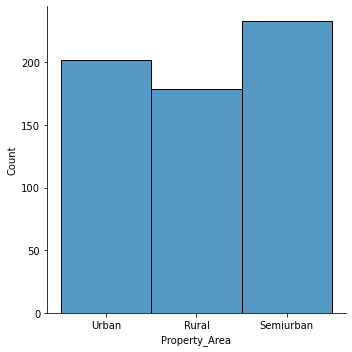

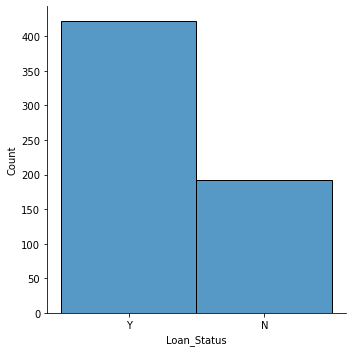

In [15]:
for _ ,column in enumerate(loan_train_df.columns):
    sns.displot(loan_train_df[column])

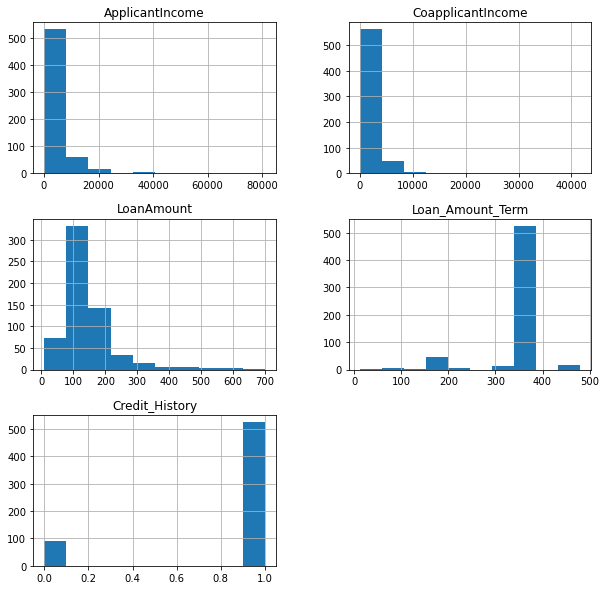

In [16]:
loan_train_df.hist(figsize=(10,10))
plt.show()

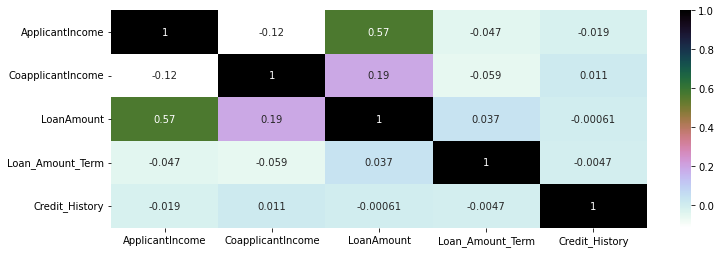

In [17]:
# draws heatmap with input as correlation matrix calculated by loan_train_df.corr() 
cormat = loan_train_df.corr()
plt.figure(figsize=(12,4))
sns.heatmap(cormat, annot=True, cmap='cubehelix_r') 
plt.show()

In [18]:
cormat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


## working on the second dataset "loan_test_df"

In [24]:
#chek the shape of the data

loan_test_df.shape

(367, 12)

In [20]:
loan_test_df.shape

(367, 12)

In [21]:
#Fill in missing values

loan_test_df['Gender'].fillna(loan_test_df['Gender'].mode()[0], inplace=True)
loan_test_df['Married'].fillna(loan_test_df['Married'].mode()[0], inplace=True)
loan_test_df['Dependents'].fillna(loan_test_df['Dependents'].mode()[0], inplace=True)
loan_test_df['Self_Employed'].fillna(loan_test_df['Self_Employed'].mode()[0], inplace=True)
loan_test_df['LoanAmount'].fillna(loan_test_df['LoanAmount'].median(), inplace=True)
loan_test_df['Loan_Amount_Term'].fillna(loan_test_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test_df['Credit_History'].fillna(loan_test_df['Credit_History'].mode()[0], inplace=True)

In [23]:
#There are no more missing values in the DataFrame

print(loan_test_df.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [22]:
loan_test_df.shape

(367, 12)

In [65]:
#Drop Loan_ID columns
loan_test_df.drop('Loan_ID', axis=1, inplace=True)

#OneHotEncode the data
loan_test = pd.get_dummies(loan_test_df, columns=['Gender', 'Married','Dependents', 'Self_Employed', 'Education', 'Property_Area'], drop_first=True)
loan_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [66]:
loan_test.shape

(367, 14)

## feature engineering

In [32]:
#dropped the Loan_ID Column because it has nothing to do with our prediction

loan_train_df.drop(["Loan_ID"], axis=1, inplace=True)
loan_train_df.shape

(614, 12)

##  Split the data into features and response.

In [33]:
features = loan_train_df.drop("Loan_Status", axis=1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [34]:
response = loan_train_df['Loan_Status']
response

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [35]:
#OneHotEncode the features data

X = pd.get_dummies(features, columns=['Gender', 'Married','Dependents', 'Self_Employed', 'Education', 'Property_Area'], drop_first=True)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [36]:
#LabelEncode the response

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(response)
y.shape

(614,)

In [37]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

## Build Model

#### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

#instantiated an object from the DecisionTreeClassifier called dec_tree_clf and fit it
dec_tree_clf = DecisionTreeClassifier(random_state=42)

#fit the model
dec_tree_clf.fit(X_train,y_train)

#make prediction using the fitted model
pred_dec_tree_clf = dec_tree_clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

#calculate the accuracy score
acc_score = accuracy_score(y_test, pred_dec_tree_clf)

print('Accuracy score for DecisionTreeClassifier:  %s' % round(acc_score, 7))

Accuracy score for DecisionTreeClassifier:  0.6747967


#### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

#instantiated an object from the RandomForestClassifier called randf_clf and fit it
randf_clf = RandomForestClassifier(random_state=42)

#fit the model
randf_clf.fit(X_train, y_train)

#make prediction using the fitted model
pred_randf_clf = randf_clf.predict(X_test)

In [41]:
#calculate the accuracy score
acc_score_randf = accuracy_score(y_test, pred_randf_clf)

print('Accuracy score for RandomForestClassifier:  %s' % round(acc_score_randf, 7))

Accuracy score for RandomForestClassifier:  0.7804878


#### Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gradboost_clf = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=42)
gradboost_clf.fit(X_train, y_train)

pred_gradboost_clf = gradboost_clf.predict(X_test)

In [43]:
#calculate the accuracy score
acc_score_gradboost = accuracy_score(y_test, pred_gradboost_clf)

print('Accuracy score for GradientBoostingClassifier:  %s' % round(acc_score_gradboost, 7))

Accuracy score for GradientBoostingClassifier:  0.7886179


### Logistic Regression 

In [44]:
#Train the LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

pred_log_reg = log_reg.predict(X_test)

In [45]:
#calculate the accuracy score
acc_score_log_reg = accuracy_score(y_test, pred_log_reg)

print('Accuracy score for LogisticRegression:  %s' % round(acc_score_log_reg, 7))

Accuracy score for LogisticRegression:  0.7886179


## GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

### GridSearch on Random Forest Classifier using cv=3

In [47]:
# -----
# final-Grained RandomForestRegressor GridSearch
# -----

#Here I instantiate an object of GridSearchCV class called grid_search_cv with random_state of 42, and set cv=3.
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth':[4,5,6,7,8,9], 
               'max_leaf_nodes': list(range(2, 10, 1)), 
               'min_samples_split':[2,3,4,5] }]

randf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid, 
                              verbose=1, 
                              cv=3)

#Here I call the fit() method to perform grid search using 3-fold validation.
randf_clf_grid.fit(X_train,y_train)
print("The best parameters are: ", randf_clf_grid.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
The best parameters are:  {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_split': 2}


In [48]:
#I retrained the model using the best parameters gotten using the gridsearch

#instantiated an object from the RandomForestClassifier called randf_clf and fit it
grid_randf_clf = RandomForestClassifier(max_depth=6, max_leaf_nodes=8, min_samples_split=2, random_state=42)

#fit the model
grid_randf_clf.fit(X_train, y_train)

#make prediction using the fitted model
grid_pred_randf_clf = grid_randf_clf.predict(X_test)

In [49]:
#calculate the accuracy score
acc_score_grid_randf = accuracy_score(y_test, grid_pred_randf_clf)

print('Accuracy score for RandomForestClassifier:  %s' % round(acc_score_grid_randf, 7))

Accuracy score for RandomForestClassifier:  0.7886179


### GridSearch on Decision Tree Classifier using cv=3

In [50]:
# -----
# Final-Grained DecisionTreeClassifier GridSearch
# -----

param_grid = [{'max_depth' : [2,3,4,5,6],
              'min_samples_split' : list(range(8,15,1)),
              'splitter' : ["best", "random"]}]

tree_reg_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                 param_grid,
                                 verbose=0,
                                 cv=3)

tree_reg_grid_search.fit(X_train, y_train)

print("The best parameters are: ", tree_reg_grid_search.best_params_)

The best parameters are:  {'max_depth': 2, 'min_samples_split': 8, 'splitter': 'random'}


In [51]:
#I retrained the model using the best parameters gotten using the gridsearch

#instantiated an object from the DecisionTreeClassifier called dec_tree_clf and fit it
grid_dec_tree_clf = DecisionTreeClassifier(max_depth=2, min_samples_split=8, splitter='random', random_state=42)

#fit the model
grid_dec_tree_clf.fit(X_train,y_train)

#make prediction using the fitted model
grid_pred_dec_tree_clf = grid_dec_tree_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

#calculate the accuracy score
acc_score_grid_treeclf = accuracy_score(y_test, grid_pred_dec_tree_clf)

print('Accuracy score for DecisionTreeClassifier:  %s' % round(acc_score_grid_treeclf, 7))

Accuracy score for DecisionTreeClassifier:  0.7886179


### GridSearch on Gradient Boosting Classifier using cv=3

In [53]:
# -----
# final-Grained GradientBoostingRegressor GridSearch
# -----

# Here I instantiate an object of GridSearchCV class called grid_search with random_state of 42, and set cv=3.

param_grid = [{'max_depth' : [1,2,3],
              'learning_rate' : [0.01, 0.02,0.03, 0.04,0.05],
              'n_estimators' : [38,39,40,41,42]}]

gbrt_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                                 param_grid,
                                 verbose=0,
                                 cv=3)

#Here I call the fit() method to perform grid search using 3-fold validation.
gbrt_grid_search.fit(X_train, y_train)

print("The best parameters are: ", gbrt_grid_search.best_params_)

The best parameters are:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 41}


In [54]:
grid_gradboost_clf = GradientBoostingClassifier(n_estimators=41, max_depth=1, 
                                                learning_rate=0.01, random_state=42)
grid_gradboost_clf.fit(X_train, y_train)

grid_pred_gradboost_clf = grid_gradboost_clf.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

#calculate the accuracy score
acc_score_grid_gboost = accuracy_score(y_test, grid_pred_gradboost_clf)

print('Accuracy score for DecisionTreeClassifier:  %s' % round(acc_score_grid_gboost, 7))

Accuracy score for DecisionTreeClassifier:  0.7886179


In [56]:
#I used tabulate library to tabulate my data

from tabulate import tabulate
mydata = [
      ['Models', 'Item', 'Model(%)', 'GridSearchCV Optimization(%)'],
      ["", '', '', ''],
    
      ['Decision Tree', 'Accuracy', round(acc_score, 6)*100, round(acc_score_grid_treeclf, 6)*100],
      ["", '', '', ''],
      ['Random Forest', 'Accuracy', round(acc_score_randf, 6)*100, round(acc_score_grid_randf, 6)*100],
      ["", '', '', ''],
      ['Gradient Boosting', 'Accuracy', round(acc_score_gradboost, 6)*100, round(acc_score_grid_gboost, 6)*100],
      ["", '', '', ''],
      ['Logistic Regression', 'Accuracy', round(acc_score_log_reg, 6)*100, 'NA'],
  
]

# display table
print(tabulate(mydata, tablefmt="plain"))

Models               Item      Model(%)  GridSearchCV Optimization(%)

Decision Tree        Accuracy  67.4797   78.8618

Random Forest        Accuracy  78.0488   78.8618

Gradient Boosting    Accuracy  78.8618   78.8618

Logistic Regression  Accuracy  78.8618   NA


# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for all three models.

In [58]:
from sklearn.metrics import mean_squared_error

pred_dec_tree_clf = dec_tree_clf.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, pred_dec_tree_clf)

pred_randf_clf = randf_clf.predict(X_test)
pred_randf_clf_mse = mean_squared_error(y_test, pred_randf_clf)

pred_gradboost_clf = gradboost_clf.predict(X_test)
pred_gradboost_clf_mse = mean_squared_error(y_test, pred_gradboost_clf)

pred_log_reg = log_reg.predict(X_test)
pred_log_reg_mse = mean_squared_error(y_test, pred_log_reg)


print("The generalization error for DecisionTreeClassifier: ", tree_reg_mse)
print("The generalization error for RandomForestClassifier: ", pred_randf_clf_mse)
print("The generalization error for GradientBoostingClassifier: ", pred_gradboost_clf_mse)
print("The generalization error for LogisticRegression: ", pred_log_reg_mse)

The generalization error for DecisionTreeClassifier:  0.3252032520325203
The generalization error for RandomForestClassifier:  0.21951219512195122
The generalization error for GradientBoostingClassifier:  0.21138211382113822
The generalization error for LogisticRegression:  0.21138211382113822


## Final Model Selection and Justification

The overall accuracy score is between 70% ~ 80%, which is fair, but not too good. To better predict loan status better, I recommend we increase the number of instances to more than 5000!

Based on critical analysis, Gradient Boosting Classifier and Logistic Regression has the same Accuracy score as well as the  computed generalization error, however, looking at the ROC Curve, Logistic Regression seems to be overfitting the dataset. So Gradient Boosting Classifier best characterizes this data because it has the lowest generalization error and highest Accuracy score among the trained models. So we can go ahead and deploy this model using this classifier

## Prepare loan_test set for prediction

In [70]:
#Now I will use the second dataset to predict the response (Loan_Status) variables

Loan_Status = gradboost_clf.predict(loan_test)
Loan_Status

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [69]:
loan_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


## Putting the predicted values back to the loan_test original DataFrame

In [74]:
#Prepare the DataFrame for insertion
Loan_Status = pd.DataFrame(Loan_Status)
Loan_Status

,0
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [76]:
#insert 'Loan_Status' back into the DataFrame at the end of the DataFrame.

loan_test.insert(14, 'Loan_Status', Loan_Status.values)
loan_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,1
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [77]:
loan_test.shape

(367, 15)